<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Package:


In [1]:
!pip install git+https://github.com/tobnie/gaze_predictor_nn.git

import gaze_predictor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tobnie/gaze_predictor_nn.git to /tmp/pip-req-build-u_zjys5d
  Running command git clone -q https://github.com/tobnie/gaze_predictor_nn.git /tmp/pip-req-build-u_zjys5d
  Created wheel for gaze-predictor: filename=gaze_predictor-1.0-py3-none-any.whl size=7006647 sha256=7ee36e5ffa269cbe0d66cc3c38e39f1393eddb415c64b6bc97c1c0879d46eec8
  Stored in directory: /tmp/pip-ephem-wheel-cache-e480sga8/wheels/fb/60/2c/eca224cb9d23d9b8f6e38fe609cdc3286e1c6b614ecbd2d007
Successfully built gaze-predictor


General Hyperparameters:

In [2]:
epochs = 200

# FC NN

Configuration for NN:

In [3]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [4]:
from gaze_predictor.gaze_predictor.fully_connected import FCNetwork

fc_nn = gaze_predictor.gaze_predictor.fully_connected.FCNetwork(name='fc_nn', configuration = nn_configuration)
fc_nn.create_model()

Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 128)               38528     
                                                                 
 Hidden2 (Dense)             (None, 32)                4128      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 132,989
Trainable params: 132,989
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [5]:
fc_nn.train()

Epoch 1/200
1487/1487 [==============================] - 7s 4ms/step - loss: 4.7001 - root_mean_squared_error: 2.1680 - val_loss: 4.6561 - val_root_mean_squared_error: 2.1578
Epoch 2/200
1487/1487 [==============================] - 9s 6ms/step - loss: 4.2714 - root_mean_squared_error: 2.0667 - val_loss: 4.3840 - val_root_mean_squared_error: 2.0938
Epoch 3/200
1487/1487 [==============================] - 5s 3ms/step - loss: 3.9157 - root_mean_squared_error: 1.9788 - val_loss: 4.0131 - val_root_mean_squared_error: 2.0033
Epoch 4/200
1487/1487 [==============================] - 5s 3ms/step - loss: 3.6447 - root_mean_squared_error: 1.9091 - val_loss: 4.3187 - val_root_mean_squared_error: 2.0782
Epoch 5/200
1487/1487 [==============================] - 5s 3ms/step - loss: 3.3954 - root_mean_squared_error: 1.8427 - val_loss: 3.6829 - val_root_mean_squared_error: 1.9191
Epoch 6/200
1487/1487 [==============================] - 5s 3ms/step - loss: 3.1809 - root_mean_squared_error: 1.7835 - val_l

Evaluate Model:

465/465 [==============================] - 1s 1ms/step - loss: 1.7263 - root_mean_squared_error: 1.3139

Test root_mean_squared_error: 1.3138867616653442

Test loss: 1.7262985706329346


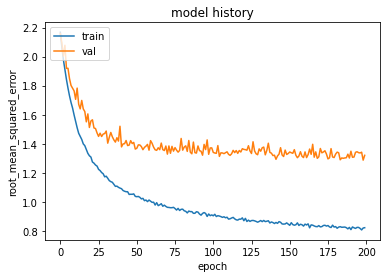

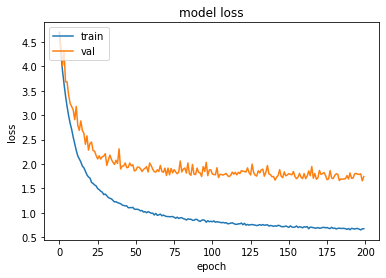

(1.3138867616653442, 1.7262985706329346)

In [6]:
fc_nn.evaluate()

# ConvNet

Configuration for NN:

In [7]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [8]:
from gaze_predictor.gaze_predictor.convolutional import ConvNetwork

conv_nn = gaze_predictor.gaze_predictor.convolutional.ConvNetwork(name='conv_nn', configuration = nn_configuration)
conv_nn.create_model()

Created model for conv_nn:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Conv (Conv2D)         (None, 15, 20, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 10, 12)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 840)               0         
                                                                 
 Dense1 (Dense)              (None, 40)                33640     
                                                                 
 Dense2_Out (Dense)          (None, 1)                 41        
                                                                 
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_______________________

Train Model:

In [9]:
conv_nn.train()

Epoch 1/200
1487/1487 [==============================] - 14s 9ms/step - loss: 4.7091 - root_mean_squared_error: 2.1700 - val_loss: 4.8453 - val_root_mean_squared_error: 2.2012
Epoch 2/200
1487/1487 [==============================] - 10s 7ms/step - loss: 4.4902 - root_mean_squared_error: 2.1190 - val_loss: 4.8259 - val_root_mean_squared_error: 2.1968
Epoch 3/200
1487/1487 [==============================] - 10s 6ms/step - loss: 4.2719 - root_mean_squared_error: 2.0669 - val_loss: 4.5215 - val_root_mean_squared_error: 2.1264
Epoch 4/200
1487/1487 [==============================] - 9s 6ms/step - loss: 3.9897 - root_mean_squared_error: 1.9974 - val_loss: 4.1608 - val_root_mean_squared_error: 2.0398
Epoch 5/200
1487/1487 [==============================] - 10s 6ms/step - loss: 3.6592 - root_mean_squared_error: 1.9129 - val_loss: 3.8070 - val_root_mean_squared_error: 1.9511
Epoch 6/200
1487/1487 [==============================] - 9s 6ms/step - loss: 3.3336 - root_mean_squared_error: 1.8258 - v

Evaluate Model:

465/465 [==============================] - 1s 3ms/step - loss: 2.0622 - root_mean_squared_error: 1.4360

Test root_mean_squared_error: 1.436036229133606

Test loss: 2.0622000694274902


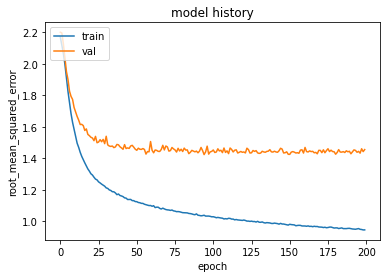

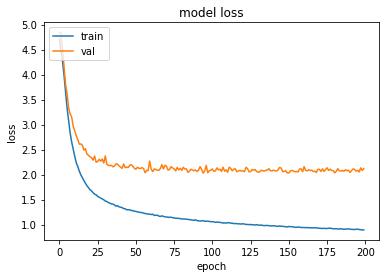

(1.436036229133606, 2.0622000694274902)

In [10]:
conv_nn.evaluate()

# ConvNet 3D

Configuration for NN:

In [11]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 3),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [12]:
from gaze_predictor.gaze_predictor.convolutional_3d import ConvNetwork3D

conv_nn_3d = gaze_predictor.gaze_predictor.convolutional_3d.ConvNetwork3D(name='conv_nn_3d', configuration = nn_configuration)
conv_nn_3d.create_model()

Created model for conv_nn_3d:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1_In (Conv2D)           (None, 15, 20, 12)        336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 10, 12)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 840)               0         
                                                                 
 Dense1 (Dense)              (None, 40)                33640     
                                                                 
 Dense2_Out (Dense)          (None, 1)                 41        
                                                                 
Total params: 34,017
Trainable params: 34,017
Non-trainable params: 0
____________________

Train Model:

In [13]:
conv_nn_3d.train()

Epoch 1/200
1487/1487 [==============================] - 11s 7ms/step - loss: 4.4957 - root_mean_squared_error: 2.1203 - val_loss: 4.4477 - val_root_mean_squared_error: 2.1090
Epoch 2/200
1487/1487 [==============================] - 11s 7ms/step - loss: 4.1453 - root_mean_squared_error: 2.0360 - val_loss: 4.2211 - val_root_mean_squared_error: 2.0545
Epoch 3/200
1487/1487 [==============================] - 10s 7ms/step - loss: 3.9571 - root_mean_squared_error: 1.9892 - val_loss: 4.0656 - val_root_mean_squared_error: 2.0163
Epoch 4/200
1487/1487 [==============================] - 10s 6ms/step - loss: 3.7796 - root_mean_squared_error: 1.9441 - val_loss: 3.9632 - val_root_mean_squared_error: 1.9908
Epoch 5/200
1487/1487 [==============================] - 10s 7ms/step - loss: 3.5197 - root_mean_squared_error: 1.8761 - val_loss: 3.6613 - val_root_mean_squared_error: 1.9135
Epoch 6/200
1487/1487 [==============================] - 10s 7ms/step - loss: 3.2164 - root_mean_squared_error: 1.7934 -

Evaluate Model:

465/465 [==============================] - 2s 3ms/step - loss: 1.8632 - root_mean_squared_error: 1.3650

Test root_mean_squared_error: 1.3649979829788208

Test loss: 1.8632193803787231


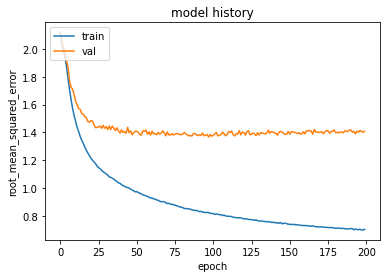

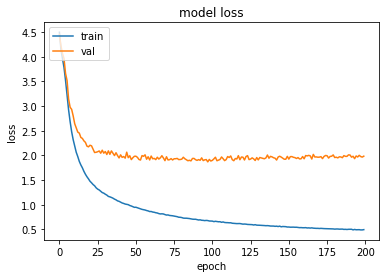

(1.3649979829788208, 1.8632193803787231)

In [14]:
conv_nn_3d.evaluate()

Save Models:

In [17]:
# fc_nn.save_model()
# conv_nn.save_model()
# conv_nn_3d.save_model()

TypeError: ignored

In [ ]:
#